# Section 0: Import libraries, download MNIST data sets, and separate data for training and testing.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle

from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

from tensorflow import keras
from keras import activations
from keras import backend as K
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.9.2
Keras version: 2.9.0


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# to train a neural network, always scale/standardize the inputs
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test /255

# Q1: Implement a Deep MLP model with the concepts seen in class, perform model selection (manual or automatic)

- Variant: architecture, number of layers and neurons
- Activation function: ReLU, ELU, SeLU (among others, Leaky ReLU, PReLU, etc.)
- Tip: the initialization strategy used must be consistent with the activation functions used
- Tip: use early stop

## Comparison of the best executed models

To choose the best activation function, we developed 4 lines of evaluation, one for each model:
- selu
- relu
- leaky relu
- elu

For each type we carry out between 3 and 5 different architectures, varying the number of hidden layers and neurons, maintaining a learning rate of 0.1.
Next, we take the best result from each activation function and integrate it into a scatterplot. The same as below.
The result was that the Relu function performed better.

In [ ]:
trained_models = {
    'best_relu' : 'model_relu.h5',
    'best_selu' : 'model_selu.h5',
    'best_leaky_relu' : 'model_leaky_relu.h5',
    'best_elu' : 'model_elu.h5'
}

mse = []
for model_name in trained_models:
  model = keras.models.load_model(trained_models[model_name])
  model.summary()
  mse.append(model.evaluate(X_test, y_test)+[model_name])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 2ms/step - loss: 0.3359 - accuracy: 0.8836
Model: "sequential_133"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_131 (Flatten)       (None, 784)               0         
   

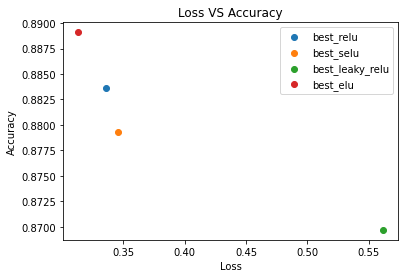

In [ ]:
for m in mse:
  plt.scatter(
      m[0],#[x[0] for x in mse],
      m[1]#[x[1] for x in mse],
  )
plt.legend(
    [x[2] for x in mse]
)
plt.xlabel('Loss')
plt.ylabel('Accuracy')
plt.title('Loss VS Accuracy')
plt.show()

**Finally, to optimize our best function, we develop new architectures based on the ReLU activation function, considering different learning rates and also trying to vary the architecture. As a final result we had a better 1 hidden layer model with 2800 neurons and a learning rate of 0.04.**

## Best Model: loss: 0.3075 - accuracy: 0.8911 - epochs: 28

In [ ]:
model_best = keras.models.Sequential()
model_best.add(keras.layers.Flatten(input_shape=[28, 28])) # capa de entrada
model_best.add(keras.layers.Dense(2800, activation="relu",  kernel_initializer="he_uniform")) # primera capa oculta
model_best.add(keras.layers.Dense(10, activation="sigmoid")) # capa de salida

optimizer = keras.optimizers.SGD(lr=0.04)
model_best.compile(loss = "sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),]
history_best = model_best.fit(X_train, 
                    y_train, 
                    epochs=1000, 
                    validation_data=(X_valid, y_valid),
                    callbacks=my_callbacks)

Epoch 1/1000


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1719/1719 [==============================] - 18s 10ms/step - loss: 0.5252 - accuracy: 0.8200 - val_loss: 0.4161 - val_accuracy: 0.8578
Epoch 2/1000
1719/1719 [==============================] - 18s 11ms/step - loss: 0.3928 - accuracy: 0.8630 - val_loss: 0.3732 - val_accuracy: 0.8700
Epoch 3/1000
1719/1719 [==============================] - 17s 10ms/step - loss: 0.3544 - accuracy: 0.8756 - val_loss: 0.3495 - val_accuracy: 0.8756
Epoch 4/1000
1719/1719 [==============================] - 17s 10ms/step - loss: 0.3292 - accuracy: 0.8837 - val_loss: 0.3425 - val_accuracy: 0.8790
Epoch 5/1000
1719/1719 [==============================] - 16s 10ms/step - loss: 0.3115 - accuracy: 0.8897 - val_loss: 0.3218 - val_accuracy: 0.8842
Epoch 6/1000
1719/1719 [==============================] - 19s 11ms/step - loss: 0.2957 - accuracy: 0.8946 - val_loss: 0.3372 - val_accuracy: 0.8770
Epoch 7/1000
1719/1719 [==============================] - 17s 10ms/step - loss: 0.2820 - accuracy: 0.8989 - val_loss: 0.3456 

In [ ]:
mse_test = model_best.evaluate(X_test, y_test)
mse_test

313/313 [==============================] - 2s 5ms/step - loss: 0.3075 - accuracy: 0.8911


[0.3075414299964905, 0.8910999894142151]

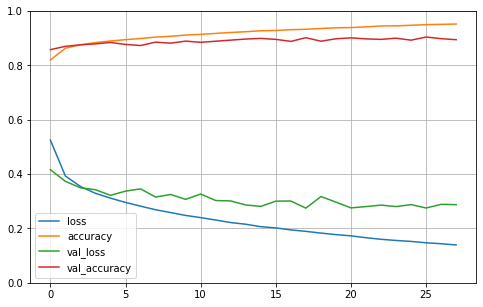

In [ ]:
pd.DataFrame(history_best.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
model_best.save("model_best_q1.h5")

with open('/content/history_best_q1.pickle', 'wb') as file_pi:
    pickle.dump(history_best.history, file_pi)

# Section 2: For the best network architecture of the previous stage

- Use sigmoid type activation functions with Batch Normalization type layers
- Use the learning rate of Q1 x 5

**Report in a graph the validation error of the two architectures (Q1 vs Q2) depending on the training times (Similar to Figure 2 of the paper: Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift)**

## Mejor modelo: loss: 0.3415 - accuracy: 0.8910 - epochs: 18

In [ ]:
# Read model
model_best_improved = keras.models.Sequential()
model_best_loaded = keras.models.load_model("model_best_q1.h5")

In [ ]:
# We modified the activation functions of the layers and added batch normalization.
for n in range(0, len(model_best_loaded.layers)):
  if n > 0: model_best_loaded.layers[n].activation = activations.sigmoid
  model_best_improved.add(model_best_loaded.layers[n])
  if n < len(model_best_loaded.layers) - 1:  model_best_improved.add( keras.layers.BatchNormalization())

model_best_improved.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization_19 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense (Dense)               (None, 2800)              2198000   
                                                                 
 batch_normalization_20 (Bat  (None, 2800)             11200     
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 10)                28010     
                                                                 
Total params: 2,240,346
Trainable params: 2,233,178
No

In [ ]:
# We copy the compilation parameters
model_best_improved.compile(
    loss = model_best_loaded.loss, 
    optimizer = model_best_loaded.optimizer, 
    metrics = ["accuracy"]#model_best_loaded.metrics
)

# We change the learning rate
K.set_value(model_best_improved.optimizer.learning_rate, model_best_improved.optimizer.learning_rate*5)

In [ ]:
# We compile the model
n_epochs = 100
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
callbacks = [early_stopping_cb]

history_improved = model_best_improved.fit(
    X_train, 
    y_train, 
    epochs = n_epochs,
    validation_data = (X_valid, y_valid),
    callbacks = callbacks
)

Epoch 1/100
1719/1719 [==============================] - 35s 20ms/step - loss: 2.4530 - accuracy: 0.7818 - val_loss: 0.8505 - val_accuracy: 0.8358
Epoch 2/100
1719/1719 [==============================] - 37s 21ms/step - loss: 0.6687 - accuracy: 0.8398 - val_loss: 0.5203 - val_accuracy: 0.8596
Epoch 3/100
1719/1719 [==============================] - 34s 20ms/step - loss: 0.3986 - accuracy: 0.8708 - val_loss: 0.3937 - val_accuracy: 0.8782
Epoch 4/100
1719/1719 [==============================] - 34s 20ms/step - loss: 0.3224 - accuracy: 0.8871 - val_loss: 0.3434 - val_accuracy: 0.8866
Epoch 5/100
1719/1719 [==============================] - 33s 19ms/step - loss: 0.2809 - accuracy: 0.8975 - val_loss: 0.3571 - val_accuracy: 0.8842
Epoch 6/100
1719/1719 [==============================] - 34s 20ms/step - loss: 0.2615 - accuracy: 0.9052 - val_loss: 0.3362 - val_accuracy: 0.8894
Epoch 7/100
1719/1719 [==============================] - 33s 19ms/step - loss: 0.2434 - accuracy: 0.9110 - val_loss: 0

In [ ]:
model_best_improved.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3415 - accuracy: 0.8910


[0.34154605865478516, 0.890999972820282]

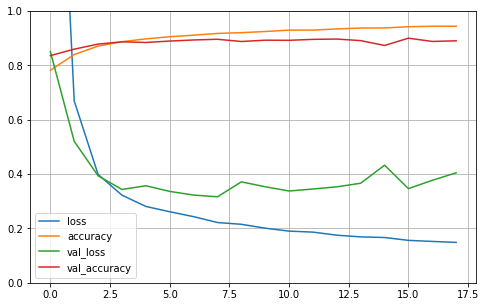

In [ ]:
pd.DataFrame(history_improved.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model_best_loaded.save("model_best_q2.h5")
with open('/content/history_best_q2.pickle', 'wb') as file_pi:
    pickle.dump(history_improved.history, file_pi)

## Comparison of Q1 vs. Q2

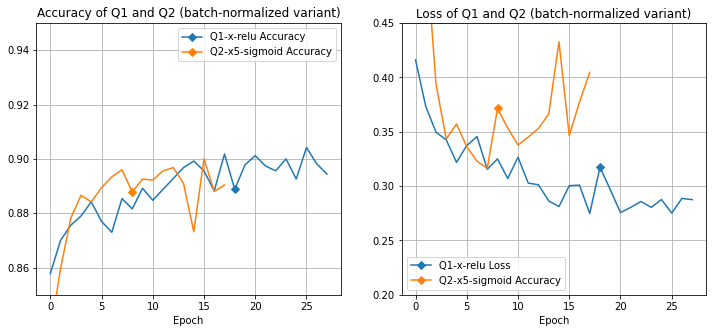

In [ ]:
df_history_SB = pd.DataFrame(data=pd.read_pickle('history_best_q1.pickle'))
df_history_CB = pd.DataFrame(data=pd.read_pickle('history_best_q2.pickle'))

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
ax1.plot(df_history_SB['val_accuracy'], '-D', markevery=[len(df_history_SB['val_accuracy']) - 10], label='Q1-x-relu Accuracy')
ax1.plot(df_history_CB['val_accuracy'], '-D', markevery=[len(df_history_CB['val_accuracy']) - 10], label='Q2-x5-sigmoid Accuracy')
ax1.set_title('Accuracy of Q1 and Q2 (batch-normalized variant)')
ax1.set_xlabel('Epoch')
ax1.set_ylim(0.85,0.95)
ax1.grid(True)
ax1.legend();

ax2.plot(df_history_SB['val_loss'], '-D', markevery=[len(df_history_SB['val_accuracy']) - 10], label='Q1-x-relu Loss')
ax2.plot(df_history_CB['val_loss'], '-D', markevery=[len(df_history_CB['val_accuracy']) - 10], label='Q2-x5-sigmoid Accuracy')
ax2.set_title('Loss of Q1 and Q2 (batch-normalized variant)')
ax2.set_xlabel('Epoch')
ax2.set_ylim(0.2,0.45)
ax2.grid(True)
ax2.legend();

# Section 3: For the best model of Q2 vs Q1

- SGD
- Momentum
- Nesterov
- AdaGrad
- RMSProp
- ADAM

**Report a graph similar to the graph in Figure 1 of the article: https://arxiv.org/pdf/1412.6980.pdf — use training loss (no need to use early stop)**

## Entrenamiento de modelo con optimizador

In [ ]:
# Read model
model_best_loaded = keras.models.load_model("model_best_q1.h5")
model_best_loaded.summary()
print("\nOPTIMIZER \n", model_best_loaded.optimizer.get_config())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 2800)              2198000   
                                                                 
 dense_1 (Dense)             (None, 10)                28010     
                                                                 
Total params: 2,226,010
Trainable params: 2,226,010
Non-trainable params: 0
_________________________________________________________________

OPTIMIZER 
 {'name': 'SGD', 'learning_rate': 0.04, 'decay': 0.0, 'momentum': 0.0, 'nesterov': False}


In [ ]:
# Momentum
optimizer = keras.optimizers.SGD(
  # learning_rate=model_best_loaded.optimizer.learning_rate.numpy(), 
  learning_rate=0.001,
  momentum=0.9
)
# Adam
# optimizer = keras.optimizers.Adam(
  ## learning_rate=model_best_loaded.optimizer.learning_rate.numpy(), 
  # learning_rate=0.001,
  # beta_1=0.9, 
  # beta_2=0.999    
# )
model_best_loaded.optimizer = optimizer
model_best_loaded.optimizer.get_config()

{'name': 'SGD',
 'learning_rate': 0.001,
 'decay': 0.0,
 'momentum': 0.9,
 'nesterov': False}

In [ ]:
# Compile model
n_epochs = 100

history_optimizer = model_best_loaded.fit(
    X_train, 
    y_train, 
    epochs = n_epochs,
    validation_data = (X_valid, y_valid)
)

Epoch 1/100
1719/1719 [==============================] - 33s 19ms/step - loss: 0.1562 - accuracy: 0.9484 - val_loss: 0.2717 - val_accuracy: 0.9032
Epoch 2/100
1719/1719 [==============================] - 32s 19ms/step - loss: 0.1516 - accuracy: 0.9497 - val_loss: 0.2759 - val_accuracy: 0.9002
Epoch 3/100
1719/1719 [==============================] - 30s 18ms/step - loss: 0.1488 - accuracy: 0.9512 - val_loss: 0.2717 - val_accuracy: 0.8998
Epoch 4/100
1719/1719 [==============================] - 31s 18ms/step - loss: 0.1468 - accuracy: 0.9520 - val_loss: 0.2679 - val_accuracy: 0.9026
Epoch 5/100
1719/1719 [==============================] - 30s 17ms/step - loss: 0.1451 - accuracy: 0.9528 - val_loss: 0.2678 - val_accuracy: 0.9052
Epoch 6/100
1719/1719 [==============================] - 30s 17ms/step - loss: 0.1428 - accuracy: 0.9537 - val_loss: 0.2708 - val_accuracy: 0.9036
Epoch 7/100
1719/1719 [==============================] - 32s 18ms/step - loss: 0.1408 - accuracy: 0.9550 - val_loss: 0

In [ ]:
model_best_loaded.evaluate(X_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.3239 - accuracy: 0.9012


[0.3239193260669708, 0.901199996471405]

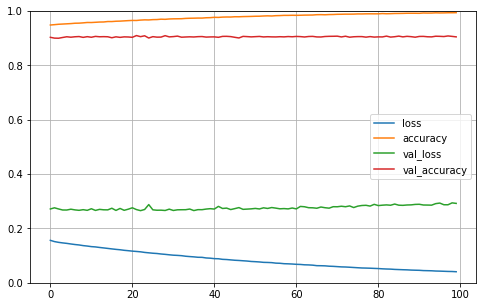

In [ ]:
pd.DataFrame(history_optimizer.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model_best_loaded.save("model_momentum_v2_q3.h5")
with open('/content/history_momentum_v2_q3.pickle', 'wb') as file_pi:
    pickle.dump(history_optimizer.history, file_pi)

## Comparison of the cost of work with the optimizer

The best MODEL between Q1 and Q2 is Q1 with a **loss: 0.3075 - precision: 0.8911 - times: 28**. Therefore, several optimizers have been used for this model, in order to later compare the cost of training them. In this way, we can validate which of these optimizers allows a more significant reduction from a lower LOSS epoch in the training process.

In [ ]:
df_history = pd.DataFrame()
history_names = {
    'adagrap' : 'history_adagrap_q3.pickle',
    'adam' : 'history_adam_q3.pickle',
    'momentum' : 'history_momentum_q3.pickle',
    'nesterov' : 'history_nesterov_q3.pickle',
    'rms' : 'history_rms_q3.pickle',
    'sgd' : 'history_sgd_q3.pickle'
}

for h_name in history_names:
  df_history[h_name] = (pd.read_pickle(history_names[h_name]))['loss']

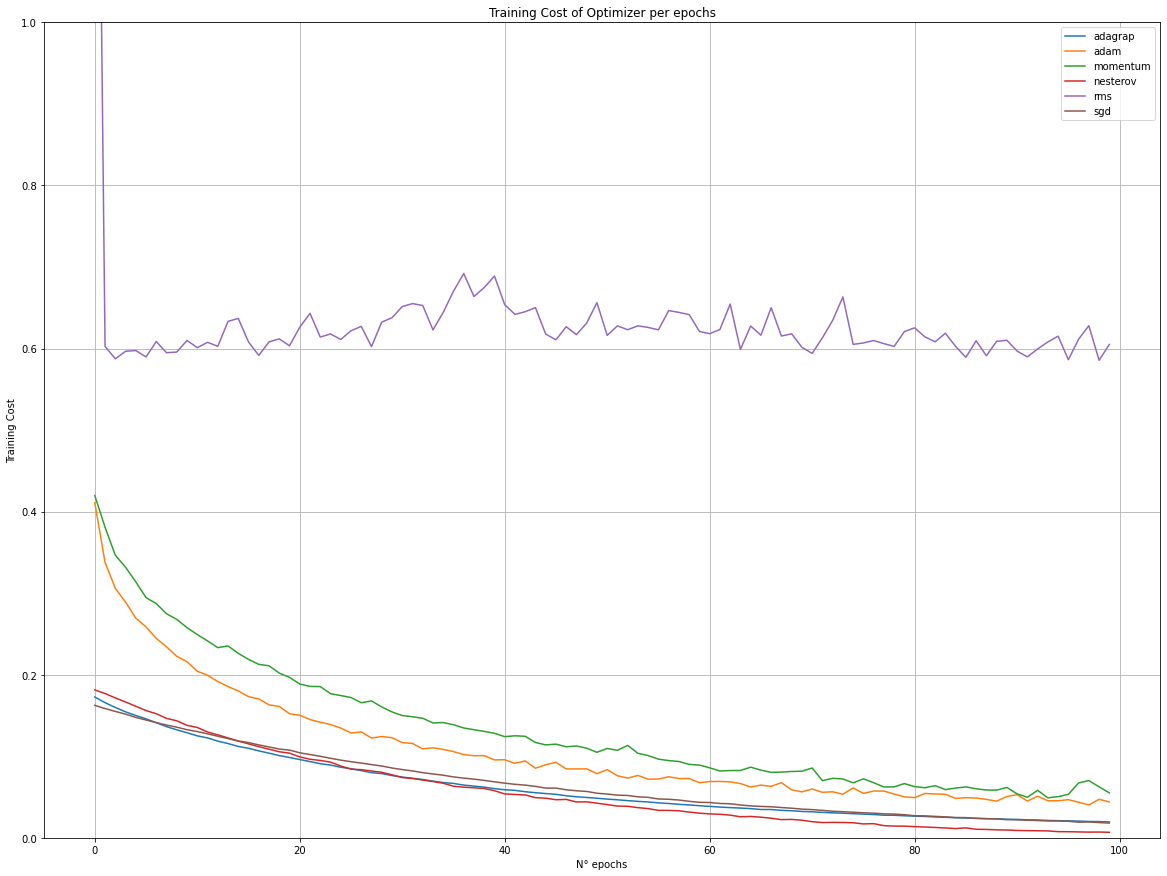

In [ ]:
df_history.plot(figsize=(20, 15))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('N° epochs')
plt.ylabel('Training Cost')
plt.title('Training Cost of Optimizer per epochs')
plt.show()

The **NESTEROV** optimizer presents a better TRAINING COST (LOSS) optimization since epoch 40 (out of 100), over the rest of the optimizers; the worst of these is RMS. Keeping a certain similarity with the one presented in the document *ADAM: A METHOD FOR STOCHASTIC OPTIMIZATION*, where this optimizer occupies the second place in the comparison; unlike the paper, the ADAM optimizer ranks FOURTH among the evaluated optimizers.